Homework 6 -- Hannah Chipman

Consulted with Mady Kady and June Kim

Note that I only completed some portions due to time constraints with also working on the final project and other coursework.

**1. Explore a working example**
1. Open `example.ipynb` and read the code.
2. Consult the pytorch documentation to learn what the arguments of the various employed pytorch functions mean.
3. Run the code.
4. Replace SGD with Adam in the training process. Then run the code again.
5. Save the output figures that show training and validation accuracy as a function of the number of epochs in your file system.

Notes: Example appeared to use Adam initially, so swapped in SGD instead. SGD performed very poorly, with around 11% test accuracy, and no real minimization of the loss function over the course of the 10 epochs. Plots are saved in the same directory with filenames SGD_Homework6.png and Adam_Homework6.png respectively.

In [1]:
# import packages
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess the MNIST dataset

# Define an array transformation that transforms the images to tensor format 
# and normalizes the pixel values to the range [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training and test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, 
    download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, 
    download=True, transform=transform)

# Split the training dataset into a training set and a validation set
train_set, val_set = random_split(train_dataset, [50000, 10000])

# Create data loaders for the training, validation, and test sets
# A DataLoader in PyTorch is an object that simplifies and automates
# batching, shuffling, and loading data for model training and evaluation. 
train_loader = DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = DataLoader(val_set, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

**2. Build a network**
Create your own working example. (You are allowed to copy any amount of code from `example.ipynb`.) Your CNN should be different from the CNN in the working example in the following ways:
1. The new CNN should have three convolutional layers instead of two. The first layer creates 32 channels. The second layer creates 64 channels, and the third layer creates 128 channels.
2. The pooling layer after the third layer should not employ any padding.
3. The last hidden layer should have 512 neurons.
4. For all layers except the output layer, the activation function should be a ReLU (use `torch.nn.ReLU`).

In [11]:
# Define CNN architecture

class CNN(nn.Module):
    """
    A Convolutional Neural Network (CNN) for classifying MNIST images.
    
    The network consists of a feature extraction architecture and a 
    classification architecture. The feature-extraction architecture includes
    two convolutional layers. Each of the convolutional layers is followed by 
    a sigmoid activation and a max pooling layer. The classification 
    architecture includes two fully connected layers for classification.

    Attributes:
    conv1 : torch.nn.Conv2d
        The first convolutional layer
    conv2 : torch.nn.Conv2d
        The second convolutional layer
    activation : torch.nn activation function
        Activation function used for input and hidden layers
    pool : torch.nn.MaxPool2d
        The pooling layer
    fc1 : torch.nn.Linear
        The first fully connected layer
    fc2 : torch.nn.Linear
        The second fully connected layer

    Methods:
    __init__(self): 
        This function creates an instance of this class.
    forward(self, x):
        Performs a forward pass for an input x.
    """

    def __init__(self):
        """
        Initialize the CNN model by defining its layers.
        """
        # Create an instance of the parent class `nn.Module`
        super(CNN, self).__init__()

        # `self.name = object` creates an attribute with the name `name` for 
        # our the newly created instance of our class, and it assigns that
        # attribute the value `object`. Example: For your first homework, you
        # could have create a class `TicTacToe`. Adding the line 
        # `self.is_game_over = False` to the instance-initialization function
        # of that class would ensure that everytime a new game of TicTacToe is 
        # initialized, it would have an attribute `is_game_over` and initially
        # the value of that attribute would be `False`. 
        # Here, we use the class-attribute syntax to create layers for our CNN.
        
        # Define the first convolutional layer. It uses a 8 filters of size 
        # 3-by-3 to turn a 1-channel image into an 32-channel image.         
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)

        # The MNIST images are grayscale images. Therefore, the input data for
        # out CNN has only one channel. Color images typically come with three
        # channels: a red channel, a green channel, and a blue channel. 
        # Throughout the feature extraction, the number of channels typically 
        # changes quite drastically. The channels of the transformed features
        # typically do not correspond to colors anymore. Instead, different
        # channels of the transformed image contain different information about
        # the original image. For example, a channel created by applying an
        # edge-detection filter would have information about the locations of 
        # sharp edges. A channel created by applying a blur filter would have
        # information about the coarse-grained distribution of light and dark
        # patches.
        
        # Define the second convolutional layer. It uses filters of size 
        # 3-by-3 to turn a 32-channel image into an 64-channel image.
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Define the third convolutional layer. 
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        # Define the activation function
        self.activation = nn.ReLU()
        # Define a pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        # Define a fully connected layer hidden with 128 nodes
        # Inputs are num_channels in previous layer x image height x image width
        self.fc1 = nn.Linear(18 * 8 * 8, 512)
        # Define the output layer with 10 nodes
        self.fc2 = nn.Linear(512, 10)
        
    def forward(self, x):
        """
        Define the forward pass of the CNN.

        Parameters:
        x : torch.Tensor
            The input tensor containing the image batch.

        Returns:
        torch.Tensor
            The output tensor containing the class scores for each image.
        """
        # Pass the input through the first convolutional layer, then apply activation
        x = self.activation(self.conv1(x))
        # Pass the input through the first pooling layer
        x = self.pool(x)
        # Pass the input through the second convolutional layer, then apply activation
        x = self.activation(self.conv2(x))
        # Pass the input through the second pooling layer
        x = self.pool(x) 
        # Pass the input through the third convolutional layer, then apply activation
        x = self.activation(self.conv3(x))
        # Pass the input through the third pooling layer
        x = self.pool(x)     
        # Change the shape of x into a 1d array
        x = x.view(-1, 18 * 8 * 8)
        # Pass the input through the full connected hidden layer, then apply activation
        x = self.activation(self.fc1(x))
        # Pass the input through the last layer
        x = self.fc2(x)
        return x

In [48]:
# Define training pipeline including validation after each epoch

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    """
    Train the CNN model.

    Parameters:
    model : torch.nn.Module
        The CNN model to be trained.
    train_loader : torch.utils.data.DataLoader
        The data loader for the training set.
    val_loader : torch.utils.data.DataLoader
        The data loader for the validation set.
    criterion : torch.nn.modules.loss._Loss
        The loss function to be used.
    optimizer : torch.optim.Optimizer
        The optimizer to be used.
    epochs : int
        The number of epochs for training.

    Returns:
    tuple
        A tuple containing lists of training loss, validation loss, training accuracy, and validation accuracy.
    """
    # Initialize lists to store training and validation loss
    train_loss, val_loss = [], []
    # Initialize lists to store training and validation and accuracy
    train_acc, val_acc = [], []

    # Loop over the number of epochs
    for epoch in range(epochs):
        # Set the model to training mode
        model.train()  
        # Initialize the running loss for the epoch
        running_loss = 0.0  
        # Initialize counters for correct predictions and total samples
        correct, total = 0, 0  

        # Learning algorithm is SGD with minibatch. Iterating over the dataload
        # returns images and labels in batches.
        
        # Iterate over batches of training data
        for images, labels in train_loader:
            # Zero the gradients to prevent accumulation from previous iterations
            optimizer.zero_grad()  
            # Perform a forward pass through the model to get predictions
            outputs = model(images)  
            # Compute the loss between predictions and true labels
            loss = criterion(outputs, labels)  
            # Perform a backward pass to compute gradients via backpropagation
            loss.backward()  
            # Update model parameters based on the computed gradients
            optimizer.step()  

            # Add up the loss
            running_loss += loss.item()  
            # Get the predicted class with the highest score
            _, predicted = torch.max(outputs.data, 1)  
            # Update the total number of samples
            total += labels.size(0)  
            # Update the number of correct predictions
            correct += (predicted == labels).sum().item()  

        # Compute and store the average training loss for the epoch
        train_loss.append(running_loss / len(train_loader))  
        # Compute and store the training accuracy for the epoch
        train_acc.append(100 * correct / total)  

        # Set the model to evaluation mode
        model.eval()  
        # Initialize the running loss for validation
        val_running_loss = 0.0  
        #  Initialize counters for correct predictions and total samples in validation
        val_correct, val_total = 0, 0  
        
        # Disable gradient calculation for validation to save memory and computation
        with torch.no_grad():
            # Iterate over batches of validation data
            for images, labels in val_loader:
                # Perform a forward pass through the model to get predictions
                outputs = model(images)  
                # Compute the loss between predictions and true labels
                loss = criterion(outputs, labels)  
                # Add up the loss
                val_running_loss += loss.item()  
                # Get the predicted class with the highest score
                _, predicted = torch.max(outputs.data, 1)  
                # Update the total number of samples in validation
                val_total += labels.size(0)  
                # Update the number of correct predictions in validation
                val_correct += (predicted == labels).sum().item()  

        # Compute and store the average validation loss for the epoch
        val_loss.append(val_running_loss / len(val_loader))
        # Compute and store the validation accuracy for the epoch
        val_acc.append(100 * val_correct / val_total)  
        
        # Print the results for the current epoch, including training and validation loss and accuracy
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss / len(train_loader):.4f}, '
              f'Validation Loss: {val_running_loss / len(val_loader):.4f}, '
              f'Train Acc: {100 * correct / total:.2f}%, Val Acc: {100 * val_correct / val_total:.2f}%')
        
    # Return the lists of training and validation loss and accuracy
    return train_loss, val_loss, train_acc, val_acc  

In [49]:
# Build and train a model

# Create model
model = CNN()

# Set loss function
criterion = nn.CrossEntropyLoss()

# Set training algorithm
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model
train_loss, val_loss, train_acc, val_acc = train_model(model, train_loader, val_loader, criterion, optimizer)

Epoch [1/10], Train Loss: 0.2255, Validation Loss: 0.0641, Train Acc: 93.00%, Val Acc: 98.14%
Epoch [2/10], Train Loss: 0.0491, Validation Loss: 0.0396, Train Acc: 98.44%, Val Acc: 98.83%
Epoch [3/10], Train Loss: 0.0322, Validation Loss: 0.0366, Train Acc: 98.97%, Val Acc: 98.71%
Epoch [4/10], Train Loss: 0.0249, Validation Loss: 0.0327, Train Acc: 99.15%, Val Acc: 98.99%
Epoch [5/10], Train Loss: 0.0207, Validation Loss: 0.0300, Train Acc: 99.36%, Val Acc: 99.12%
Epoch [6/10], Train Loss: 0.0160, Validation Loss: 0.0304, Train Acc: 99.47%, Val Acc: 99.12%
Epoch [7/10], Train Loss: 0.0143, Validation Loss: 0.0308, Train Acc: 99.53%, Val Acc: 99.19%
Epoch [8/10], Train Loss: 0.0129, Validation Loss: 0.0345, Train Acc: 99.59%, Val Acc: 99.14%
Epoch [9/10], Train Loss: 0.0105, Validation Loss: 0.0518, Train Acc: 99.65%, Val Acc: 98.78%
Epoch [10/10], Train Loss: 0.0084, Validation Loss: 0.0681, Train Acc: 99.72%, Val Acc: 98.23%


**3. Train and evaluate a neural network**
1. Train the neural network that you have constructed in the previous step. How have the upgrades with respect to the CNN in `example.ipynb` affected the CNN's training time?

Example training time: 1 min, 28 sec

Updated run-time (10 epochs): 4 min, 30.2s

The increased complexity of the CNN almost quadrupled the training time.

2. Test the neural network. How have the upgrades with respect to the CNN in `example.ipynb` affected the CNN's validation accuracy?

Example training accuracy: 98.02%, Val Acc: 97.47%

Upgraded training accuracy: 99.72%, Val Acc: 98.23%

The upgrades have only resulted in roughly a percentage point of validation accuracy improvement.

3. Identify the number $k$ of training epochs that gives you a good tradeoff between training time and validation accuracy.

Based on the plots from the 10 epoch training run, after 4 epochs, the training and validation accuracies increase very slowly. Plot can be seen in hw6_10epoch.png

4. Run your code again using $k$ epochs during training. Time the training (e.g. using the python library `time`).

10 epoch run-time: 4 min, 30.2s, Train Acc: 99.72%, Val Acc: 98.23%

4 epoch run-time: 1 min, 49.3s, Train Acc: 99.16%, Val Acc: 98.94%

Of note, the 4 epoch version actually had slightly higher test accuracy than the 10 epoch version, by about 0.2%

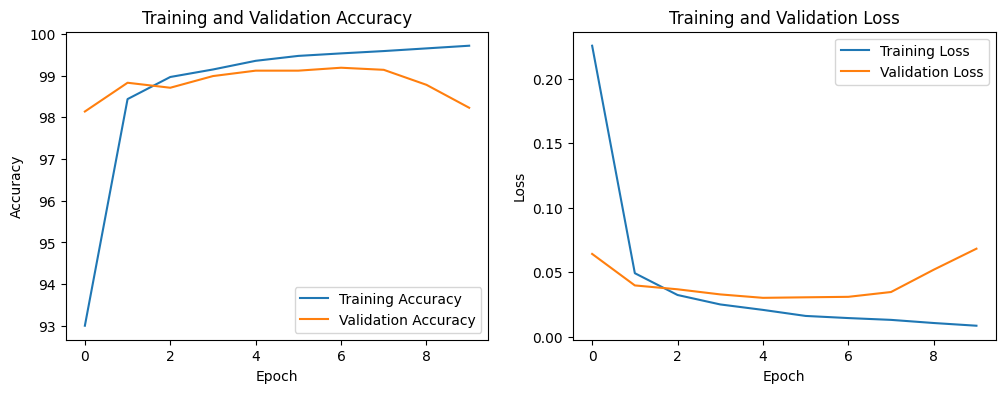

In [50]:
# Plot training & validation accuracy/loss

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.show()

In [51]:
# Evaluate the model on test set

model.eval()
test_correct, test_total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_acc = 100 * test_correct / test_total
print(f'Test Accuracy: {test_acc:.2f}%')

Test Accuracy: 98.42%


**5. Visualizing feature extraction**
1. Use the function `plot_mapped_features` to view an input image and the corresponding first channel of the hidden state for each feature-extraction layer (i.e., each convolution layer and each pooling layer).
2. Update the function so that it shows all channels instead of just one.

Given the large number of channels in the second and third hidden layers, I showed all channels for the first layer and then the first 32 for the following layers.

3. Comment on where you observe differences between the channels within a layer.

The first channel shows a black character on a light background, while the majority of the subsequent channels show the character in white/light grey. The majority of the discrepancies are around the edges of the character, and in the background color.

In [41]:
# Function to visualize the feature maps produced by different layers for a given image
def plot_mapped_features(model, image, layers):
    '''Example usage: 
    
    >>> examples = iter(test_loader)
    >>> example_data, example_labels = next(examples) # get one batch from test set
    >>> example_image = example_data[0]
    >>> layers = [model.conv1, model.pool, model.conv2, model.pool]
    >>> plot_mapped_features(model, example_image, layers)
    
    '''
    # Add a batch dimension to the image tensor (from (channels, height, width) to (1, channels, height, width))
    x = image.unsqueeze(0)
    # Create a subplot with 1 row and len(layers) columns
    fig, axes = plt.subplots(32, len(layers),figsize=(10,50))
    # Iterate over the specified layers
    for i, layer in enumerate(layers):
        # Pass the image through the current layer
        x = layer(x)
        # Detach the feature map from the computation graph and move it to CPU, then convert it to a NumPy array
        # Visualize the first channel of the feature map
        for j in range(32):
            axes[j,i].imshow(x[0,j].detach().cpu().numpy(), cmap='gray')
        # Turn off the axis for a cleaner look
            axes[j,i].axis('off')
    # Display the feature maps
    plt.show()
    
# Function to visualize the filters of a given convolutional layer
def plot_filters(layer, n_filters=6):
    '''Example usage: 

    >>> layer = model.conv1
    >>> plot_filters(layer, n_filters=6)
    
    '''
    # Clone the weights of the convolutional layer to avoid modifying the original weights
    filters = layer.weight.data.clone()
    # Normalize the filter values to the range [0, 1] for better visualization
    filters = filters - filters.min()
    filters = filters / filters.max()
    # Select the first n_filters to visualize
    filters = filters[:n_filters]
    # Create a subplot with 1 row and n_filters columns
    fig, axes = plt.subplots(1, n_filters)
    # Iterate over the selected filters
    for i, filter in enumerate(filters):
        # Transpose the filter dimensions to (height, width, channels) for visualization
        axes[i].imshow(np.transpose(filter, (1, 2, 0)))
        # Turn off the axis for a cleaner look
        axes[i].axis('off')
    # Display the filters
    plt.show()

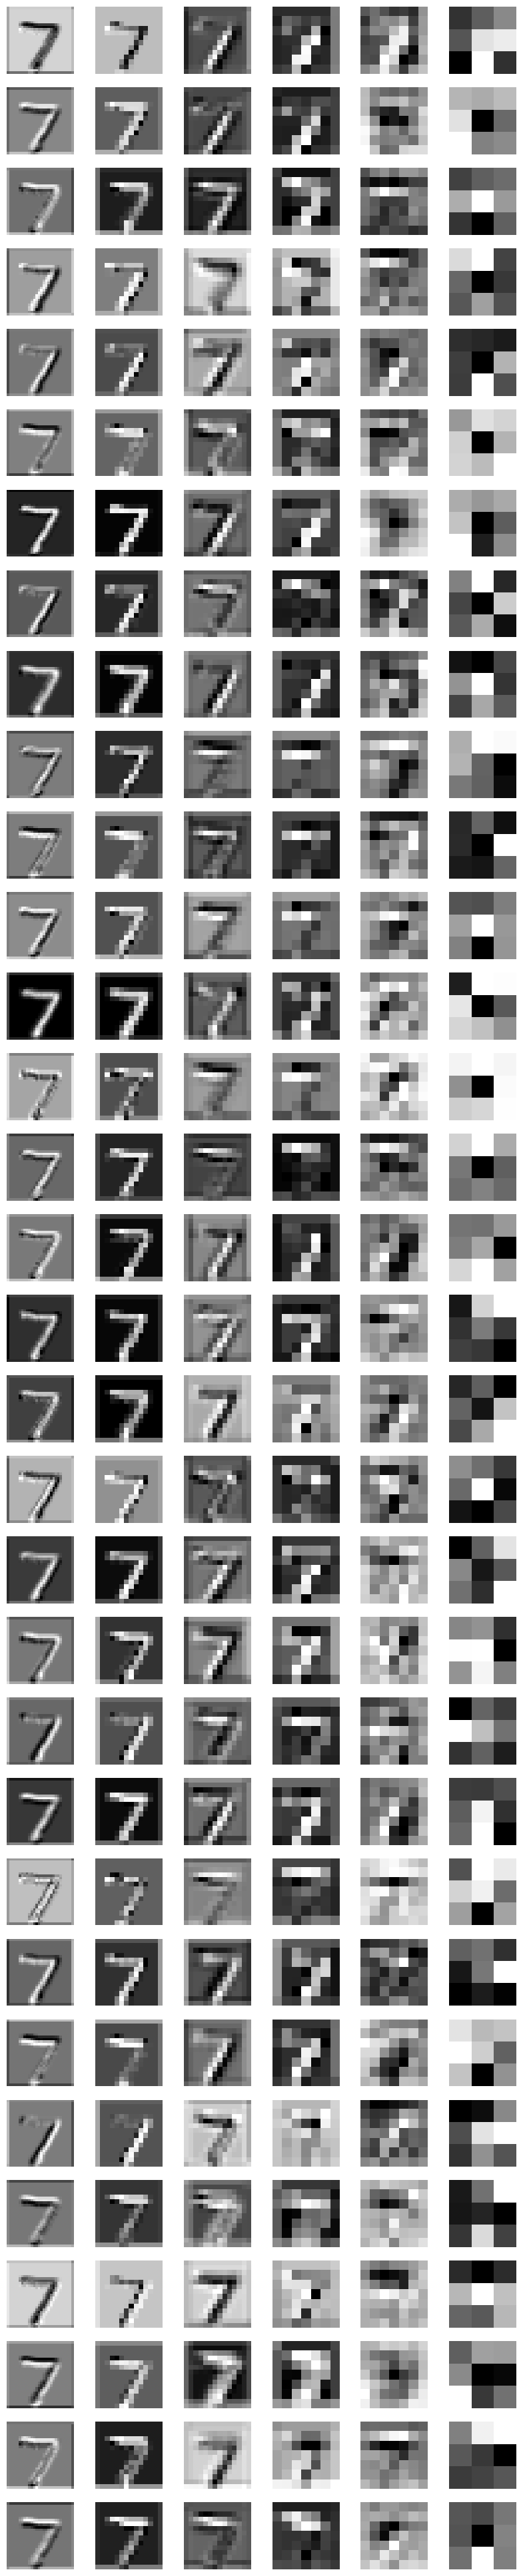

In [42]:

examples = iter(test_loader)
example_data, example_labels = next(examples) # get one batch from test set
example_image = example_data[0]
plot_mapped_features(model, example_image, [model.conv1, model.pool, model.conv2, model.pool, model.conv3, model.pool])

**6. Visualizing and interpreting filters**
1. Use the function `plot_filters` to view the trained filters of the first convolutional layer.
2. Identify the filters that perform blurring, sharpening, or horizontal or vertical edge detection.

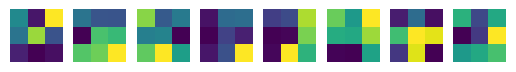

In [47]:


layer=model.conv1
plot_filters(layer, n_filters=8)

The 7th filter shown (dark in corners, medium on edges, yellow in center), appears to be a blurring filter. The fifth filter could be a vertical edge detector, since the righthand column is light while the lefthand column is dark. Likewise, the sixth and second filters might be horizontal edge detectors. Other filters appear more complex and are thus not clearly categorizable. Plotting a larger number of filters results in output too small to be particularly useful.